# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [51]:
import pandas as pd
import graphviz
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [52]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

Scikitlearn não aceita variáveis nulas e de outros tipos que não sejam numéricas. Assim, vamos ver os tipos de dados que estão presentes na base utilizada. 
Para uma verificação mais direta, montemos uma tabela com todas as variáveis ao invés de analisar X e y.

In [54]:
base_boston = X.copy()
base_boston['MEDV'] = y.copy()
base_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Verifica-se que todas as variáveis em base_boston são do tipo float64, sendo que nenhuma delas apresenta algum valor nulo. Logo, a base está em um formato adequado.

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

Montando a matriz de correlação, dando mais atenção aos valores na última coluna onde encontra-se a variável resposta "MEDV".

In [55]:
base_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Há muitas variáveis presentes na base. Para uma melhor visualização das relações entre elas, vamos ver um cluster map:

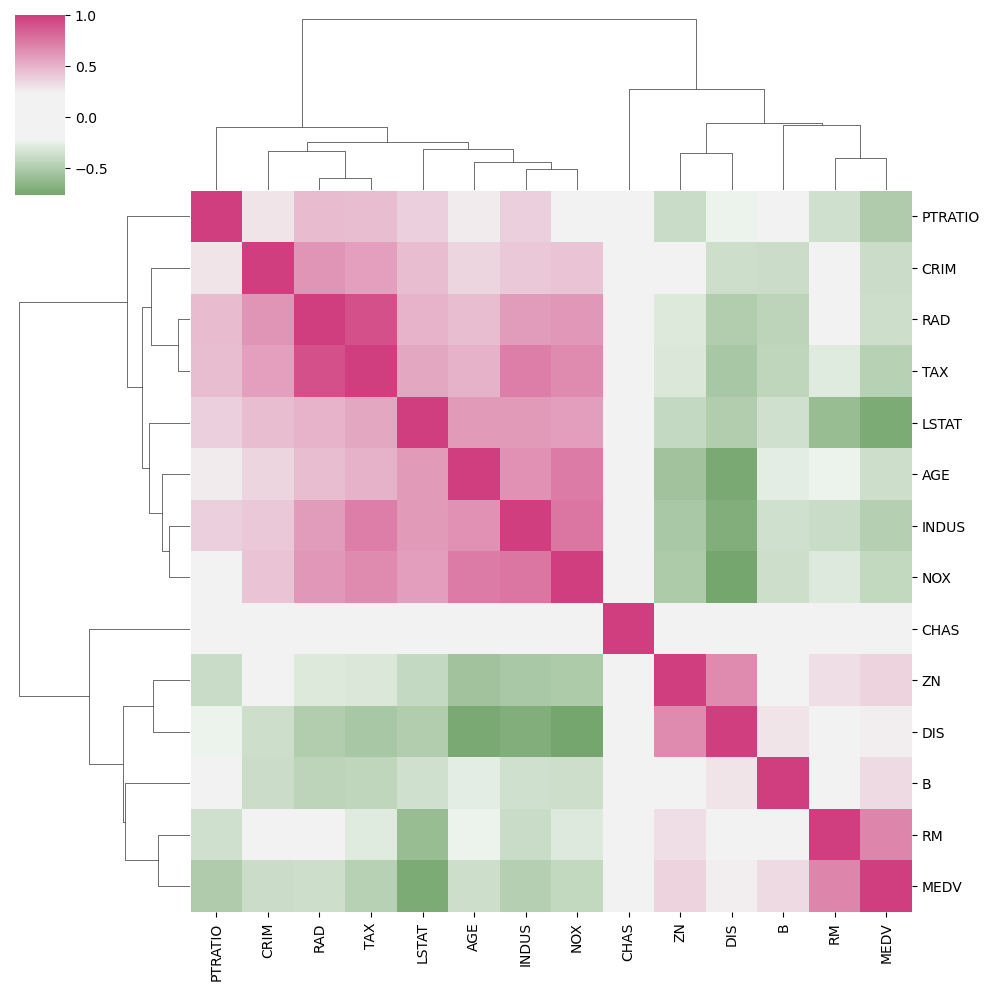

In [56]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(base_boston.corr(), figsize=(10,10), center=0, cmap=cmap)

Visualizando o gráfico, há duas variáveis que chamam atenção em relação à variável resposta "MEDV", sendo elas a "RM" (número médio de quartos por ocupação), que apresenta uma cor rosada quase escura, estando entre 0.5 e 1 (verificando a relação na matriz de correlação, percebe-se que a relação entre elas é 0.69); e a variável "LSTAT" (porcentagem da população com status inferior), estando esta com uma cor verde escura, cuja correlação é menor do que -0.5 (pela matriz de correlação, aproximadamente -0.74).

### 3. Separe os dados em validação e teste

Sejam X_teste e y_teste as variáveis de teste, enquanto que X_valid e y_valid são as variáveis de validação. Além disso, tomemos um número inteiro aleatório em random_state para que os dados sejam sempre os mesmos. 

In [57]:
X_teste, X_valid, y_teste, y_valid = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

Defininfo como arvore_max2 a árvore com profundidade máxima = 2, enquanto que arvore_max8 apresenta profundidade máxima = 8: 

In [58]:
arvore_max2 = DecisionTreeRegressor(max_depth=2)
arvore_max8 = DecisionTreeRegressor(max_depth=8)

arvore_max2.fit(X_teste, y_teste)
arvore_max8.fit(X_teste, y_teste)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

Sejam mse2 o Erro Quadrático Médio da árvore com profundidade máxima = 2, e mse8, o da árvore com profundidade máxima = 8:

In [59]:
mse2 = arvore_max2.score(X_teste, y_teste)
mse8 = arvore_max8.score(X_teste, y_teste)

analise = "O MSE da árvore com profundidade = {0} é: {1:.2f}"

print(analise.format(arvore_max2.get_depth(), mse2))
print(analise.format(arvore_max8.get_depth(), mse8))

O MSE da árvore com profundidade = 2 é: 0.71
O MSE da árvore com profundidade = 8 é: 0.98


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade = 2, uma vez que ela apresenta o menor Erro Quadrático Médio (MSE) das duas árvores geradas.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

Fazendo uma visualização da árvore através da biblioteca graphviz:

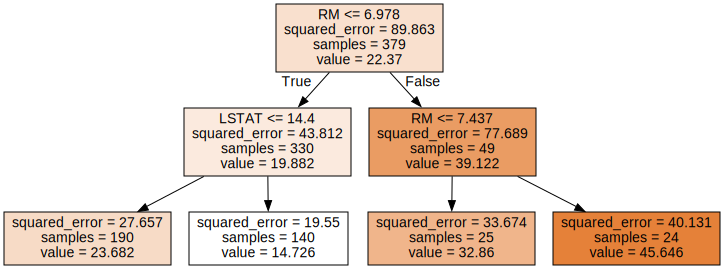

In [60]:
dados_arvore = tree.export_graphviz(arvore_max2, out_file=None,
                                    feature_names=X.columns,
                                    filled=True)

grafico_arvore = graphviz.Source(dados_arvore, format="png")
grafico_arvore

Aparentemente, a variável mais importante para a árvore foi a "RM" (número médio de quartos por habitação), uma vez que esta apareceu no nó raíz da árvore.